# Telescope Data Correlation Analysis and PCA Information Distribution

This script analyzes telescope data by creating correlation matrices and performing Principal Component Analysis (PCA). It first loads and cleans the data, then generates a heatmap showing feature correlations (Image 1). The eigenvalue analysis (Image 2) reveals that the first principal component explains over 400% of the average variance, with subsequent components showing rapidly diminishing returns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./telescope_data.csv', index_col=0)

In [3]:
print(df.columns)
print(df.info())
df.isnull().sum()
df = df.dropna()

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.7+ MB
None


In [4]:
float_cols = df.select_dtypes(include=['float64', 'float32']).columns
data_matrix = df[float_cols] 

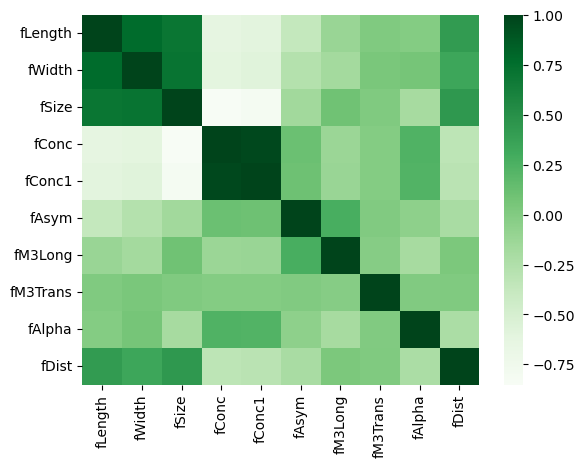

In [5]:
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
plt.show()

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [7]:
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

(10,) (10, 10)


In [8]:
info_prop = eigenvalues/eigenvalues.mean()
info_percentage = info_prop*100

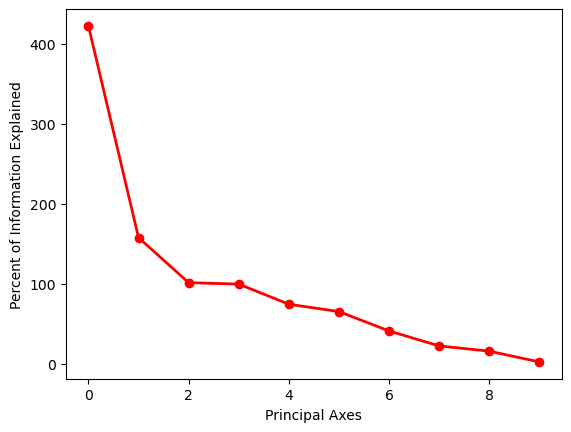

In [9]:
plt.figure()
plt.plot(info_percentage, 'ro-', linewidth=2)
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()


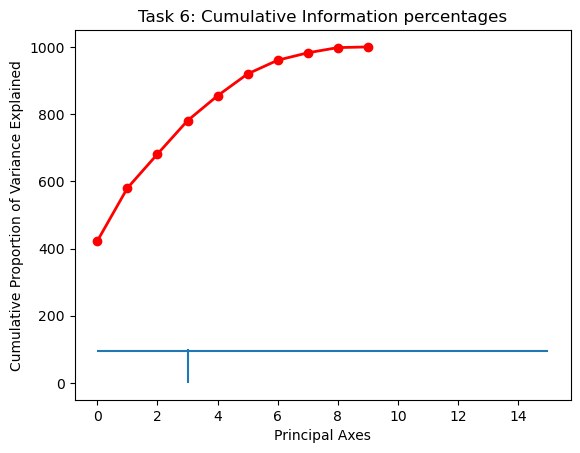

In [10]:
cumulative_information_percents =np.cumsum(info_percentage)

plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()